In [154]:
import tensorflow as tf
import matplotlib.pylab as plt
import numpy as np
import os
from pathlib import Path
import imghdr

### For cleaning images that tensorflow cannot read

In [155]:
# from pathlib import Path
# import imghdr

# directory = 'data/Siamese/'
# image_extensions = [".png", ".jpg", ".jpeg", ".bmp"]  

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(directory).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.remove(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.remove(filepath)

In [156]:
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [157]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'data',
    seed = 123,
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    subset = 'training',
    validation_split = 0.2,
)

Found 1263 files belonging to 9 classes.
Using 1011 files for training.


In [158]:
vali_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'data',
    seed = 123,
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    subset = 'validation',
    validation_split = 0.2,
)

Found 1263 files belonging to 9 classes.
Using 252 files for validation.


In [159]:
class_names = train_ds.class_names

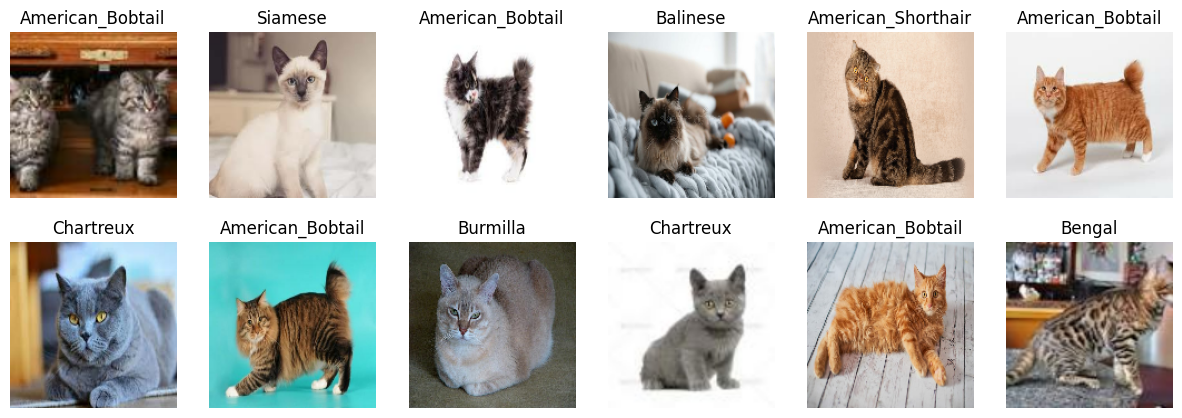

In [160]:
plt.figure(figsize=(15,5))

for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(2,6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [161]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

In [162]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9)
])

In [163]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [164]:
history = model.fit(
    train_ds,
    validation_data = vali_ds,
    epochs = 10
)

Epoch 1/10
32/32 [==============================] - 18s 495ms/step - loss: 2.6000 - accuracy: 0.1335 - val_loss: 2.1026 - val_accuracy: 0.1230
Epoch 2/10
32/32 [==============================] - 14s 416ms/step - loss: 1.9462 - accuracy: 0.2651 - val_loss: 1.7937 - val_accuracy: 0.3175
Epoch 3/10
32/32 [==============================] - 14s 408ms/step - loss: 1.7389 - accuracy: 0.3689 - val_loss: 1.7303 - val_accuracy: 0.3690
Epoch 4/10
32/32 [==============================] - 14s 405ms/step - loss: 1.5486 - accuracy: 0.4471 - val_loss: 1.6345 - val_accuracy: 0.4524
Epoch 5/10
32/32 [==============================] - 14s 407ms/step - loss: 1.4482 - accuracy: 0.4955 - val_loss: 1.5943 - val_accuracy: 0.4444
Epoch 6/10
32/32 [==============================] - 14s 407ms/step - loss: 1.3666 - accuracy: 0.5193 - val_loss: 1.5184 - val_accuracy: 0.5079
Epoch 7/10
32/32 [==============================] - 14s 406ms/step - loss: 1.2373 - accuracy: 0.5589 - val_loss: 1.5956 - val_accuracy: 0.4643